In [95]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [96]:
emp_df = pd.read_csv("E:/emp_data.csv")

### QUESTIONS TO ANALISE
>**QUESTION ONE:** Which division is the highest paying 

>**QUESTION TWO:**Are there more females or males in the top and least paying department

>**QUESTION THREE:** How many additional workers will be needed for each department


### DATA CLEANING

In [97]:
emp_df.isnull().sum()

Department                         6
Department Name                    4
Division                           0
Gender                             0
Base Salary                        4
How much pay for overtime/year?    0
dtype: int64

>There are a maximum of sixteen rows with missing data so i'll just drop all the rows with missing data
because sixteen is a very small fraction of the whole data set

In [98]:
emp_df.dropna(inplace=True)


>some column names are spaced out, i'll rename them. Department Name to Dept_Name, Base Salary to B_salary and How much pay for overtime/year to over_time_per_year


In [99]:
emp_df.rename(columns={"Department Name" : "Dept_Name", "Base Salary" : "Base_Salary", "How much pay for overtime/year?" : "overtime_per_year"}, inplace=True ) 

>Basic inforation about the number of departments and divisions


In [100]:
print(f'Number of Departments: {emp_df.Department.nunique()}')  
print(f'Number of Division: {emp_df.Division.nunique()}')  

Number of Departments: 37
Number of Division: 705


>Information about the number of males and females

In [101]:
emp_df.Gender.value_counts()

M    5945
F    4154
Name: Gender, dtype: int64

>Information about the cleaned data set.

In [102]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10099 entries, 0 to 10112
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Department         10099 non-null  object 
 1   Dept_Name          10099 non-null  object 
 2   Division           10099 non-null  object 
 3   Gender             10099 non-null  object 
 4   Base_Salary        10099 non-null  float64
 5   overtime_per_year  10099 non-null  float64
dtypes: float64(2), object(4)
memory usage: 552.3+ KB


>Base Salary stats

In [103]:
emp_df.Base_Salary.describe()[['min','mean', 'max']]

min       4816.280000
mean     78910.619039
max     303091.000000
Name: Base_Salary, dtype: float64

>Number of workers working over time

In [104]:
 (emp_df["overtime_per_year"] > 100).sum()

5592

>Stats about overtime per year

In [105]:
emp_df["overtime_per_year"].describe()[['min','mean', 'max']]

min          0.000000
mean      6412.060241
max     155034.540000
Name: overtime_per_year, dtype: float64

### DATA WRANGLING

#### QUESTION ONE

>I'll form a new frame to contain the Divisions and thier sum of base salaries so I can compare to get the maximum

In [106]:
#get each unique division and base salary sum for each.
division_df = emp_df.groupby('Division')['Base_Salary'].sum().reset_index()
#sort the data frame by the base salary
division_df.sort_values(by="Base_Salary",ascending=False, inplace=True)

#### QUESTION TWO

>For this question I'll get the names of the maximum and minimum departments and trim the emp_df data to contain only the two departments and thier respective genders and store in another data frame as Min and Max Gender Stats (MMGS)

In [107]:
department_df = emp_df.groupby('Department')[['Base_Salary', 'overtime_per_year']].sum().reset_index()

In [108]:
#get the names of the maximum and minimum departments and store in two variables
max_dept = department_df[department_df['Base_Salary']==department_df.Base_Salary.max()][["Department"]].reset_index()["Department"][0]
min_dept = department_df[department_df['Base_Salary']==department_df.Base_Salary.min()][["Department"]].reset_index()["Department"][0]



In [109]:
MMGS.describe()

,Department,Gender
count,2044,2044
unique,2,2
top,POL,M
freq,2042,1267


In [110]:
#queried the department and Gender for the min and max departments
values=[max_dept,min_dept]
MMGS = emp_df.query("Department in @values")[['Department', 'Gender']]

#### QUESTION THREE

>The main idea I have here is that, if the yearly base salary(base salary * 12) of the minimum worker per department is higher than the total over time per year, then that department doesn't really need additional workders. Since the overtime is not much enough up to that of the minimum paid worker. so hiring a worker will not help. but the number of times by which the overtime is more than the yearly base salary of a worker is an approximation of the number of additional workers needed. So

>Here i'll get  base salries for each department and the over time for each departmen. Merge them together after which I'll divide the over time by the base salary to get the approximate number of additional workers needed per department

>*The assumption here is that the base salary of a worker is per month*

In [111]:
#get the data frame for the minimum bse salary of each department
dep_min_base_salary = emp_df.groupby('Department')['Base_Salary'].min().reset_index()
dep_min_base_salary.head(5)

,Department,Base_Salary
0,BOA,58481.91
1,BOE,37506.00
2,CAT,20470.01
3,CCL,31441.07
4,CEC,20718.12


In [112]:
#get the ovetime for each department
department_overtime = emp_df.groupby('Department')['overtime_per_year'].sum().reset_index()
department_overtime.head(5)

,Department,overtime_per_year
0,BOA,0.00
1,BOE,2329.81
2,CAT,4197.13
3,CCL,3398.09
4,CEC,226799.18


In [113]:
#merging the two data
merged_data = pd.merge(dep_min_base_salary, department_overtime, on='Department')

In [114]:
#calculating the approximate number of additional workder for each department
merged_data['Approx_add_Workers'] = (merged_data['overtime_per_year']/(merged_data['Base_Salary']*12)).astype(int)

>The approximate number of additional workers needed is kept as an integer from a float value whoes decimal part is simply cut off. If there is a decimal part, this means paying an additional worker will require a base salary less than the least paid worker or it will encure overspending if the minimum base salary is paid to this worker(assuming that the minimum paid worker recieves the least possible payment) however, this means that the workers will have to work extra hours, but the number of extra hours will not be as much as before if the other workers are added


In [115]:
Dept_in_need_of_workers = merged_data[merged_data["Approx_add_Workers"]>0][['Department', 'Approx_add_Workers']]

### EXPLORATIONS 

>The two tables below give the descriptive statitics of the empolyee data for base salray and overtime per year.

In [116]:
emp_df.describe()

,Base_Salary,overtime_per_year
count,10099.000000,10099.000000
mean,78910.619039,6412.060241
std,30667.628460,12572.832421
min,4816.280000,0.000000
25%,56138.000000,0.000000
50%,75290.000000,478.360000
75%,94938.860000,7763.425000
max,303091.000000,155034.540000


In [117]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10099 entries, 0 to 10112
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Department         10099 non-null  object 
 1   Dept_Name          10099 non-null  object 
 2   Division           10099 non-null  object 
 3   Gender             10099 non-null  object 
 4   Base_Salary        10099 non-null  float64
 5   overtime_per_year  10099 non-null  float64
dtypes: float64(2), object(4)
memory usage: 552.3+ KB


>The total spending on the payment of workers per year will be the sum of total overtime per year  and total base salary per year. For this whole exploration an analysis, the assumption is that the base salary given, is a monthly base. for this reason the base salary per year will require a multiplication by 12.

In [118]:
total_spending = emp_df.Base_Salary.sum() * 12 + emp_df.overtime_per_year.sum()
print(total_spending)

9627775496.410002


>The percentage of this total contributed by overtime will be 


In [119]:
print((emp_df.overtime_per_year.sum()*100/total_spending))


0.672589388838013


>The division_df data was sorted in descending order so the first record will be that of the hishgest paying division.

In [120]:
division_df.head(1)

,Division,Base_Salary
562,School Health Services,21098371.44


>I want to plot a graph to show the relationship between males and females for the highest and lowest paying department. For this I'll need the males and females for both department. I'll writhe a function that takes in a department and the sex and returns the population of that sex in that department.  

In [121]:
#function that gets the total number of people given sex and department
def get_num(dep, sex):
    return len((MMGS[MMGS['Department']+ MMGS['Gender'] == dep + sex]))
    



>*min_dept* and *max_dept* are variables holding the name of the minimum department and maximum department.

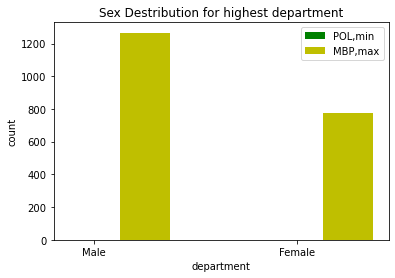

In [122]:
#ploting the graph to show the sex destribution in the lowest and highest paying department 
N = 2
ind = np.arange(N) 
width = .25
  
min_dep = [get_num(min_dept,'M'),  get_num(min_dept,'F')]
bar1 = plt.bar(ind+width, min_dep, width, color='g')
  
max_dep = [get_num(max_dept,'M'), get_num(max_dept,'F')]
bar2 = plt.bar(ind+width*2, max_dep, width, color = 'y')
  
plt.xlabel("department")
plt.ylabel('count')
plt.title("Sex Destribution for highest department")
  
plt.xticks(ind+width,['Male',  'Female'])
plt.legend( (bar1, bar2), ('POL,min', 'MBP,max') )
plt.show()

>Surprisingly, nothing shows(no green on the graph) for the minimum department. To check I'll print the value of min_dep which should contain the number of males and females in the minimun department as an array.

In [123]:
print(min_dep)
print(max_dep)

[1, 1]
[1266, 776]


>This makes sense now. Since the values are very low, we can't see them

>Concerning the number departments needing additional workers, I've ploted the graph of the table 
'Dept_in_need_of_workers'. This goes ahead of just pointing out the needy departments to suggesting the number of workers needed

Text(0.5, 1.0, 'Additional workers distribution')

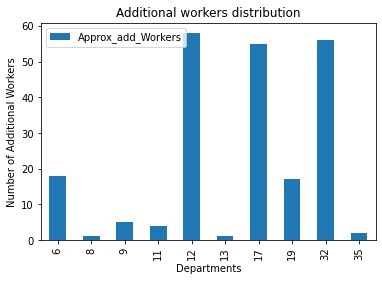

In [124]:
Dept_in_need_of_workers.plot(kind='bar')
plt.xlabel('Departments')
plt.ylabel('Number of Additional Workers')
plt.title("Additional workers distribution")

>From the graph we can see the number of departments(number of bars) needing additional workers and the approximate number of workers needed for each department(height of each bar). 

>In order to see the exact number for each department, i'll print the table

In [125]:
Dept_in_need_of_workers

,Department,Approx_add_Workers
6,COR,18
8,DEP,1
9,DGS,5
11,DLC,4
12,DOT,58
13,DPS,1
17,FRS,55
19,HHS,17
32,POL,56
35,SHF,2


### CONCLUSION



>The government has spent a total of 9637543025.410002 dollars and 0.673% of this total came from overtime.
>A total of 10113 records existed however, the column Dept Name and Base Salary had missing values for four records each. While Department had missing values for 6 records. After editing, the total number of records analysed is 10099.

>School Health Services is the highest paying division with a total base salary of 21098371.44 dollars

>The highest paying department is MBP and the lowest is POL. Only two people work in the least paying department. A male and a female while in the maximum paying department, females are just a fraction of males. And over two thousand workers work there. In order words, many more males work at MBP.

>A total of 10 departments need additional workers. DOT, FRS ad POL are the highest in need requiring about 60 additional workers each, COR and HHS follow requiring 18 and 17 workers respectively while DGS, and DLS, require just about five additional workers then DEP, DPS and SHF will need just one or two additional workers.

